# Understanding Probability vs. Likelihood

### Probability  
In the context of a **probability density function (PDF)**, the probability refers to the **area under the curve** for a given range of values. For example, in a normal distribution, the probability of a random variable \( X \) falling within a specific interval \([a,b]\) is the **integral of the PDF** over that interval.  

### Likelihood  
The **likelihood** is the value of the PDF at a specific point. It does not represent a probability but rather how **"likely"** it is to observe that specific value given the parameters of the distribution (mean and standard deviation). Unlike probability, **likelihood is not constrained to the range [0,1]**.  


here as an example we assume that our data is unnder a normal distribution

# Equation of a Normal Distribution  

The equation for the probability density function (PDF) of a normal distribution is:

$$
f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Where:  
- $(\mu)$: Mean of the distribution  
- $( \sigma )$: Standard deviation of the distribution  
- $( x )$: A specific value of the random variable  


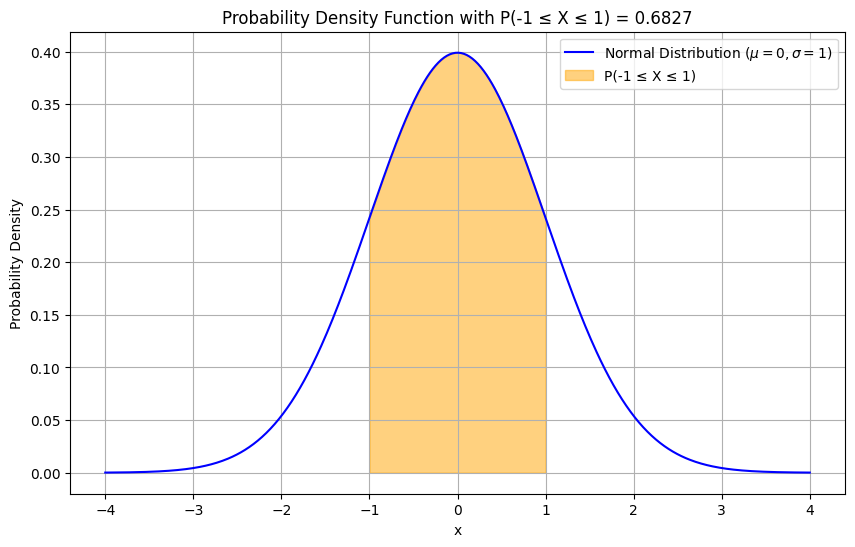

Numerical Probability P(-1 ≤ X ≤ 1): 0.6827


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fixed mean and standard deviation
mu = 0
sigma = 1

# Define the normal distribution
x = np.linspace(-4, 4, 500)
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the PDF
plt.figure(figsize=(10, 6))3
plt.plot(x, pdf, label=f'Normal Distribution ($\mu={mu}, \sigma={sigma}$)', color='blue')

# Randomly select a region [a, b] and shade it
a, b = -1, 1  # Example interval
x_fill = np.linspace(a, b, 100)
y_fill = norm.pdf(x_fill, loc=mu, scale=sigma)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label=f'P({a} ≤ X ≤ {b})')

# Calculate the probability numerically
probability = norm.cdf(b, loc=mu, scale=sigma) - norm.cdf(a, loc=mu, scale=sigma)
plt.title(f'Probability Density Function with P({a} ≤ X ≤ {b}) = {probability:.4f}')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

# Print the calculated probability
print(f"Numerical Probability P({a} ≤ X ≤ {b}): {probability:.4f}")

here we did actually asumme a fixed normal distribution that is with std dev 1 abd mean 0
and you can see that the shaded regions calculate the probability of x in the region -1 to 1

now lets solve it numerically


The probability of a random variable \( X \) falling within an interval \([a,b]\) under a normal distribution can be calculated as:  

$$
P(a \leq X \leq b) = \int_{a}^{b} f(x \mid \mu, \sigma) \, dx
$$

Where:  
$
f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$

### **Example Setup**  
Let’s assume:  
- $( \mu = 0 )$,$ ( \sigma = 1 )$ (standard normal distribution),  
- Interval $([a,b] = [-1,1])$.  

We want to compute:  
$
P(-1 \leq X \leq 1) = \int_{-1}^{1} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \, dx
$

### **Step-by-Step Calculation**  

#### **1. Write the PDF**  
The standard normal probability density function is:  
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$

#### **2. Set up the integral**  
$$
P(-1 \leq X \leq 1) = \int_{-1}^{1} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \, dx
$$

#### **3. Factor out constants**  
Since $( \frac{1}{\sqrt{2\pi}} )$ is a constant, we can write:  
$$
P(-1 \leq X \leq 1) = \frac{1}{\sqrt{2\pi}} \int_{-1}^{1} e^{-\frac{x^2}{2}} \, dx
$$

#### **4. Numerical Approximation**  
The integral  
$$
\int_{-1}^{1} e^{-\frac{x^2}{2}} \, dx
$$  
does not have a closed-form solution and must be approximated numerically. Methods like Simpson’s rule or the trapezoidal rule can be used for this approximation.  

For simplicity, we use known values from standard normal tables:  
- The cumulative distribution function (CDF) at \( x = 1 \) is approximately **0.8413**.  
- The CDF at \( x = -1 \) is approximately **0.1587**.  

Thus, the probability is:  
$
P(-1 \leq X \leq 1) = CDF(1) - CDF(-1) = 0.8413 - 0.1587 = 0.6826
$


*the calculation is not that important rather you should just focus on the concept, ideally you would solve it using python regardless*

**Now lets see how likelihood is different**

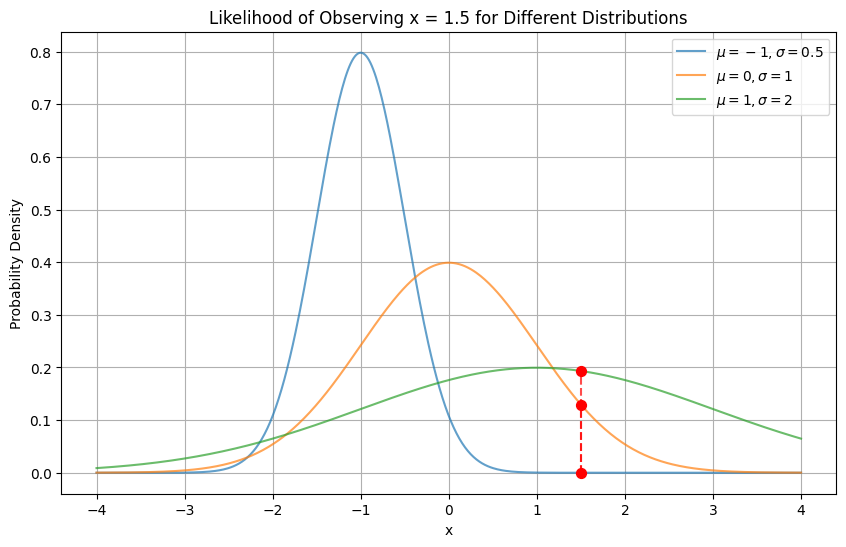

Likelihood at x = 1.5 for μ = -1, σ = 0.5: 0.0000
Likelihood at x = 1.5 for μ = 0, σ = 1: 0.1295
Likelihood at x = 1.5 for μ = 1, σ = 2: 0.1933


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define a point x_obs to evaluate the likelihood
x_obs = 1.5

# Vary the mean and std dev to show different likelihoods
means = [-1, 0, 1]
std_devs = [0.5, 1, 2]

# Plot the distributions and highlight the likelihood at x_obs
plt.figure(figsize=(10, 6))
for mu, sigma in zip(means, std_devs):
    x = np.linspace(-4, 4, 500)
    pdf = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, pdf, label=f'$\mu={mu}, \sigma={sigma}$', alpha=0.7)
    
    # Highlight the likelihood at x_obs
    likelihood = norm.pdf(x_obs, loc=mu, scale=sigma)
    plt.scatter(x_obs, likelihood, color='red', s=50, zorder=5)
    plt.vlines(x_obs, ymin=0, ymax=likelihood, color='red', linestyles='dashed', alpha=0.7)

plt.title(f'Likelihood of Observing x = {x_obs} for Different Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

# Print the likelihood values
for mu, sigma in zip(means, std_devs):
    likelihood = norm.pdf(x_obs, loc=mu, scale=sigma)
    print(f"Likelihood at x = {x_obs} for μ = {mu}, σ = {sigma}: {likelihood:.4f}")

As you can see for the same data point under normal distribution we get different Y points as we change mean and variance of the the distribution

and when we adjust the parameters mean and variance in such a way that the likelihood is maximum (often we assume multiple data points), it is called as **maximum likelihood** 
this concept is very useful for machine learning